<a href="https://colab.research.google.com/github/profugohenrique/spoincd/blob/master/SoftmaxSigma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Sigmoid
# σ(x) = 1 / (1 + e^(-x))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

class Sigmoid:
    def __init__(self):
        self.name = "Sigmoid"

    def forward(self, x):
        """Calcula a função sigmoid"""
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        """Calcula a derivada da sigmoid"""
        sig = self.forward(x)
        return sig * (1 - sig)

    def plot_function(self, x_range=(-10, 10)):
        """Plota a função sigmoid e sua derivada"""
        x = np.linspace(x_range[0], x_range[1], 1000)
        y = self.forward(x)
        dy = self.derivative(x)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(x, y, 'b-', linewidth=2, label='Sigmoid')
        plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='y=0.5')
        plt.axvline(x=0, color='g', linestyle='--', alpha=0.5, label='x=0')
        plt.xlabel('x')
        plt.ylabel('σ(x)')
        plt.title('Função Sigmoid')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(x, dy, 'r-', linewidth=2, label='Derivada')
        plt.xlabel('x')
        plt.ylabel("σ'(x)")
        plt.title('Derivada da Sigmoid')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Exemplo de uso
def exemplo_sigmoid():
    sigmoid = Sigmoid()

    # Testar com alguns valores
    valores_teste = [-5, -2, 0, 2, 5]
    print("Sigmoid - Valores de Teste:")
    for x in valores_teste:
        print(f"σ({x:2d}) = {sigmoid.forward(x):.6f}")

    # Plotar a função
    sigmoid.plot_function()

    return sigmoid

In [3]:
#Softmax
#softmax(z_i) = e^(z_i) / Σ(e^(z_j))   para j = 1 até n

In [4]:
class Softmax:
    def __init__(self):
        self.name = "Softmax"

    def forward(self, x, axis=-1):
        """Calcula a função softmax"""
        # Subtrair o máximo para estabilidade numérica
        x_shifted = x - np.max(x, axis=axis, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

    def derivative(self, x):
        """Calcula a derivada da softmax (Jacobiano)"""
        s = self.forward(x).reshape(-1, 1)
        return np.diagflat(s) - np.dot(s, s.T)

    def plot_softmax_comparison(self):
        """Compara softmax com valores originais"""
        # Dados de exemplo: logits de 3 classes
        logits = np.array([2.0, 1.0, 0.1])
        probabilities = self.forward(logits)

        classes = ['Classe A', 'Classe B', 'Classe C']

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        bars1 = plt.bar(classes, logits, alpha=0.7, color='skyblue')
        plt.ylabel('Logits (valores originais)')
        plt.title('Logits antes do Softmax')
        for bar in bars1:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom')

        plt.subplot(1, 2, 2)
        bars2 = plt.bar(classes, probabilities, alpha=0.7, color='lightcoral')
        plt.ylabel('Probabilidades')
        plt.title('Probabilidades após Softmax')
        for bar in bars2:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        print("📊 Softmax - Comparação:")
        print(f"Logits: {logits}")
        print(f"Probabilidades: {probabilities}")
        print(f"Soma das probabilidades: {np.sum(probabilities):.6f}")

# Exemplo de uso
def exemplo_softmax():
    softmax = Softmax()

    # Exemplo 1: Classificação simples
    logits = np.array([3.0, 1.0, 0.2])
    probas = softmax.forward(logits)
    print("📊 Exemplo 1 - Classificação:")
    print(f"Logits: {logits}")
    print(f"Softmax: {probas}")
    print(f"Soma: {np.sum(probas):.6f}")

    # Exemplo 2: Batch processing
    batch_logits = np.array([
        [1.0, 2.0, 3.0],
        [0.5, 1.5, 2.5]
    ])
    batch_probas = softmax.forward(batch_logits, axis=1)
    print("\nExemplo 2 - Batch:")
    print("Logits:")
    print(batch_logits)
    print("Softmax:")
    print(batch_probas)
    print("Somas:", np.sum(batch_probas, axis=1))

    # Plotar comparação
    softmax.plot_softmax_comparison()

    return softmax


 SIGMOID vs SOFTMAX - MENU INTERATIVO
1. Demonstração Completa
2. Apenas Sigmoid
3. Apenas Softmax
4. Análise de Estabilidade
5. Comparar Funções de Ativação
6. Sair
Escolha (1-6): 3
📊 Exemplo 1 - Classificação:
Logits: [3.  1.  0.2]
Softmax: [0.8360188  0.11314284 0.05083836]
Soma: 1.000000

Exemplo 2 - Batch:
Logits:
[[1.  2.  3. ]
 [0.5 1.5 2.5]]
Softmax:
[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]
Somas: [1. 1.]


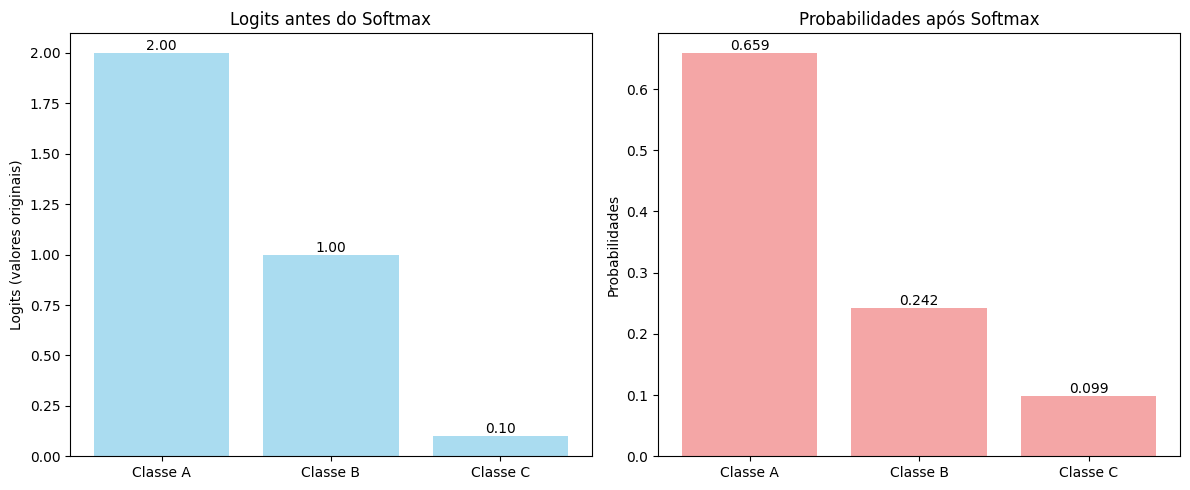

📊 Softmax - Comparação:
Logits: [2.  1.  0.1]
Probabilidades: [0.65900114 0.24243297 0.09856589]
Soma das probabilidades: 1.000000

 SIGMOID vs SOFTMAX - MENU INTERATIVO
1. Demonstração Completa
2. Apenas Sigmoid
3. Apenas Softmax
4. Análise de Estabilidade
5. Comparar Funções de Ativação
6. Sair


In [ ]:
class NeuralNetworkDemo:
    def __init__(self):
        self.sigmoid = Sigmoid()
        self.softmax = Softmax()

    def binary_classification_example(self):
        """Exemplo de classificação binária com Sigmoid"""
        print("CLASSIFICAÇÃO BINÁRIA (Sigmoid)")
        print("="*50)

        # Dados de exemplo: features -> logit -> probabilidade
        features = np.array([0.8, -0.3, 1.2])  # 3 features
        weights = np.array([0.5, -0.7, 0.3])   # pesos
        bias = 0.1

        # Calcular logit
        logit = np.dot(features, weights) + bias
        probability = self.sigmoid.forward(logit)

        print(f"Features: {features}")
        print(f"Pesos: {weights}")
        print(f"Bias: {bias}")
        print(f"Logit: {logit:.4f}")
        print(f"Probabilidade (Sigmoid): {probability:.4f}")
        print(f"Predição: {'Classe 1' if probability > 0.5 else 'Classe 0'}")

        return probability

    def multiclass_classification_example(self):
        """Exemplo de classificação multiclasse com Softmax"""
        print("\nCLASSIFICAÇÃO MULTICLASSE (Softmax)")
        print("="*50)

        # Dados de exemplo: 3 classes, 4 features
        features = np.array([1.2, -0.5, 0.8, 0.1])
        weights = np.array([
            [0.5, -0.2, 0.3, 0.1],  # pesos classe 0
            [-0.3, 0.4, 0.2, -0.1], # pesos classe 1
            [0.1, 0.2, -0.4, 0.3]   # pesos classe 2
        ])
        biases = np.array([0.1, -0.1, 0.2])

        # Calcular logits para cada classe
        logits = np.dot(weights, features) + biases
        probabilities = self.softmax.forward(logits)

        print(f"Features: {features}")
        print("Logits por classe:")
        for i, logit in enumerate(logits):
            print(f"  Classe {i}: {logit:.4f}")

        print("Probabilidades Softmax:")
        for i, prob in enumerate(probabilities):
            print(f"  Classe {i}: {prob:.4f}")

        # Predição
        predicted_class = np.argmax(probabilities)
        print(f"Predição: Classe {predicted_class}")

        return probabilities, predicted_class

    def cross_entropy_loss(self, y_true, y_pred, epsilon=1e-12):
        """Calcula a perda de entropia cruzada"""
        y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
        return -np.sum(y_true * np.log(y_pred))

    def demonstrate_loss_functions(self):
        """Demonstra funções de perda"""
        print("\nFUNÇÕES DE PERDA")
        print("="*50)

        # Exemplo binário
        y_true_binary = 1  # Classe positiva
        y_pred_binary = 0.8  # Probabilidade predita

        # Binary cross-entropy
        bce_loss = - (y_true_binary * np.log(y_pred_binary) +
                     (1 - y_true_binary) * np.log(1 - y_pred_binary))

        print("Binário:")
        print(f"  Verdadeiro: {y_true_binary}, Predito: {y_pred_binary:.3f}")
        print(f"  Perda BCE: {bce_loss:.4f}")

        # Exemplo multiclasse
        y_true_multiclass = np.array([0, 1, 0])  # One-hot encoding
        y_pred_multiclass = np.array([0.1, 0.7, 0.2])

        # Categorical cross-entropy
        cce_loss = self.cross_entropy_loss(y_true_multiclass, y_pred_multiclass)

        print("\nMulticlasse:")
        print(f"  Verdadeiro: {y_true_multiclass}")
        print(f"  Predito: {y_pred_multiclass}")
        print(f"  Perda CCE: {cce_loss:.4f}")

# Demonstração completa
def demonstracao_completa():
    """Demonstração completa das funções"""
    print("DEMONSTRAÇÃO COMPLETA: Sigmoid vs Softmax")
    print("="*60)

    nn = NeuralNetworkDemo()

    # 1. Sigmoid para classificação binária
    nn.binary_classification_example()

    # 2. Softmax para multiclasse
    nn.multiclass_classification_example()

    # 3. Funções de perda
    nn.demonstrate_loss_functions()

    # 4. Plotar funções
    sigmoid = Sigmoid()
    softmax = Softmax()

    sigmoid.plot_function()
    softmax.plot_softmax_comparison()

# 4. **Análise de Estabilidade Numérica**
def analise_estabilidade():
    """Análise de estabilidade numérica"""
    print(" ANÁLISE DE ESTABILIDADE NUMÉRICA")
    print("="*50)

    softmax = Softmax()

    # Teste com valores grandes (problema de overflow)
    large_logits = np.array([1000, 1001, 1002])
    print("Valores grandes:")
    print(f"Logits: {large_logits}")

    # Softmax ingênua (sem estabilização)
    def softmax_naive(x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x)

    try:
        naive_result = softmax_naive(large_logits)
        print(f"Softmax ingênua: {naive_result}")
    except:
        print("Softmax ingênua: Overflow!")

    # Softmax estabilizada
    stable_result = softmax.forward(large_logits)
    print(f"Softmax estabilizada: {stable_result}")
    print(f"Soma: {np.sum(stable_result):.6f}")

    # Teste com valores muito negativos
    negative_logits = np.array([-1000, -1001, -1002])
    print(f"\nValores negativos grandes: {negative_logits}")
    negative_result = softmax.forward(negative_logits)
    print(f"Softmax: {negative_result}")
    print(f"Soma: {np.sum(negative_result):.6f}")

# 5.  **Implementação em PyTorch/TensorFlow Style**
class ActivationFunctions:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def softmax(x, axis=-1):
        x_shifted = x - np.max(x, axis=axis, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def tanh(x):
        return np.tanh(x)

    @staticmethod
    def compare_activations():
        """Compara diferentes funções de ativação"""
        x = np.linspace(-5, 5, 1000)

        activations = {
            'Sigmoid': ActivationFunctions.sigmoid(x),
            'Tanh': ActivationFunctions.tanh(x),
            'ReLU': ActivationFunctions.relu(x)
        }

        plt.figure(figsize=(12, 8))
        for i, (name, y) in enumerate(activations.items(), 1):
            plt.subplot(2, 2, i)
            plt.plot(x, y, 'b-', linewidth=2)
            plt.title(name)
            plt.grid(True, alpha=0.3)
            plt.xlabel('x')
            plt.ylabel('f(x)')

        plt.tight_layout()
        plt.show()

# Executar demonstração completa
if __name__ == "__main__":
    # Demonstração interativa
    while True:
        print("\n" + "="*60)
        print(" SIGMOID vs SOFTMAX - MENU INTERATIVO")
        print("="*60)
        print("1. Demonstração Completa")
        print("2. Apenas Sigmoid")
        print("3. Apenas Softmax")
        print("4. Análise de Estabilidade")
        print("5. Comparar Funções de Ativação")
        print("6. Sair")
        print("="*60)

        escolha = input("Escolha (1-6): ").strip()

        if escolha == '1':
            demonstracao_completa()
        elif escolha == '2':
            exemplo_sigmoid()
        elif escolha == '3':
            exemplo_softmax()
        elif escolha == '4':
            analise_estabilidade()
        elif escolha == '5':
            ActivationFunctions.compare_activations()
        elif escolha == '6':
            break
        else:
            print("Opção inválida!")